<a href="https://colab.research.google.com/github/yuanzichen88/Default-Payment/blob/main/Predicting%20Credit%20Card%20Default%20Payment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upgrade xlrd so pandas can read excel file from url with its encoding
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import dependencies
import xlrd
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [ ]:
# Load data from url into a pandas dataframe
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
data = pd.read_excel(url, skiprows = 1)

In [ ]:
# Set max displayed columns so we can view all columns of data at a time 
pd.set_option('max_columns', None)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
data.isnull().sum()
# There is no Nan value that we need to worry about

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

# ID column is redundant, and can be removed for simplicity

In [ ]:
df = data.copy()
df.drop(labels='ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Quick correlation visualization

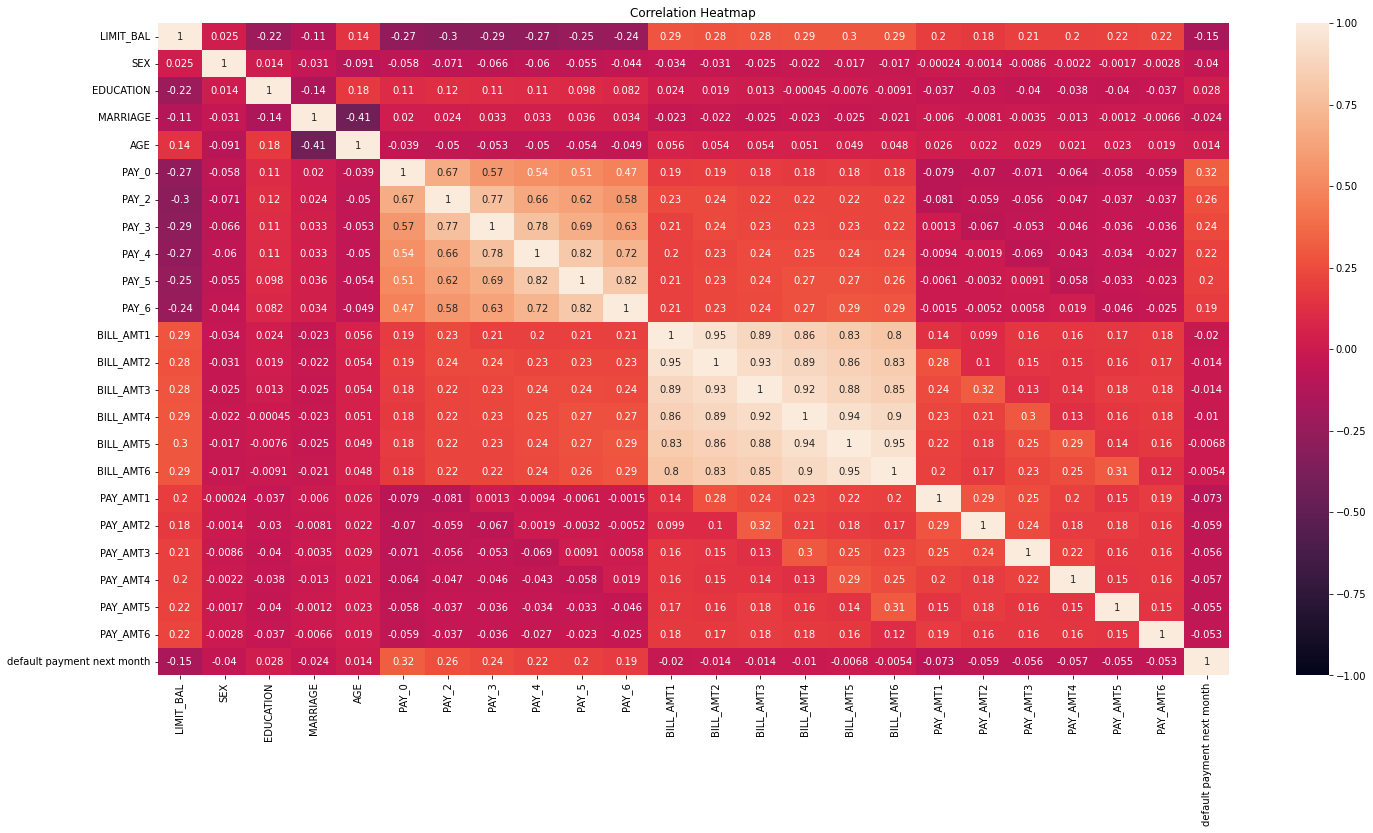

In [ ]:
# Calculate correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(24, 12))
sns.heatmap(corr, annot=True, vmin=-1.0)
plt.title('Correlation Heatmap')
plt.show()

We could clear see strong positive correlations in PAY_* and BILL_AMT* variables, which represents Paytment Status and Amount of Previous Payment.

As we visualized, only certain variables are highly correlated. For example, PAY_* are highly positively correlated to each other, meaning that people make the payment on time are going to keep making on-time payments, and vice versa.

Also, BILL_AMT* are highly positively correlated to each other, meaning that people have high statement balance are going to keep having high statement balance, and vice versa.

We could reduce number of features from the pay status and bill amount variables, if the model requires less feature in the future. We are keeping them for now for exploratory purposes.

We could also see apparent negative correlations in MARRIAGE and AGE variables. However, we could not make sense of it, as the MARRIAGE variable is not ordinal.

# Visualize data to see patterns in age
This can be applied to other variables by changing the variable name in the code.

In [ ]:
viz_df = df.copy()
viz_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
viz_mean_df = viz_df.groupby('AGE').mean().copy()
viz_mean_df.reset_index(inplace=True)
viz_mean_df.head()

,AGE,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,21,23283.582090,1.686567,2.104478,1.880597,0.194030,0.089552,0.194030,0.014925,-0.298507,-0.552239,16961.567164,16066.343284,14515.701493,12768.373134,11055.074627,7790.910448,2085.776119,1749.716418,1179.865672,1381.865672,827.656716,568.208955,0.208955
1,22,37928.571429,1.751786,1.969643,1.917857,0.405357,0.401786,0.346429,0.157143,0.078571,0.046429,24176.146429,23766.019643,22515.450000,19718.173214,16932.230357,15539.044643,2369.537500,2408.187500,1845.053571,1743.666071,1661.521429,1542.930357,0.301786
2,23,59752.953813,1.720730,1.888292,1.905478,0.250269,0.183673,0.131042,0.076262,0.044039,0.024705,29910.552095,28782.442535,26876.412460,23830.878625,22221.128894,21363.386681,3239.650913,3167.992481,2833.618690,2633.437164,2278.273899,2668.021482,0.265306
3,24,75661.047028,1.685004,1.842059,1.879326,0.223602,0.147294,0.110914,0.052351,0.023957,-0.011535,33747.833185,32483.512866,31003.772848,27955.181899,26043.818101,25660.377107,3437.509317,3456.996451,2667.676131,2734.072760,2987.842946,2745.241349,0.266193
4,25,102731.871838,1.671164,1.779933,1.870995,0.155143,0.069140,0.087690,-0.006745,-0.057336,-0.120573,41777.456998,40695.341484,38327.632378,34916.935919,31979.716695,30657.220067,4711.833895,3721.000000,3363.674536,3640.538786,2949.698988,3636.136594,0.254637


In [ ]:
viz_age_paystatus_df = viz_mean_df[['AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].melt(id_vars='AGE', var_name='PAY', value_name='PAYSTATUS')
viz_age_paystatus_df.head()

,AGE,PAY,PAYSTATUS
0,21,PAY_0,0.194030
1,22,PAY_0,0.405357
2,23,PAY_0,0.250269
3,24,PAY_0,0.223602
4,25,PAY_0,0.155143


In [ ]:
alt.data_transformers.enable('default', max_rows=None)
alt.Chart(viz_age_paystatus_df).mark_line(point=True).encode(
    x=alt.X('AGE'),
    y='PAYSTATUS',
    color='PAY',
    tooltip=['AGE', 'PAYSTATUS', 'PAY']
).properties(
    width=1200,
    height=600
)

alt.Chart(...)

Younger users – 22 years old and below are more likely to make delayed payments. They start to make more on time payments as they age into their 30s.

People older than approx. 50 years old starts to fail to make on time payments.

In [ ]:
viz_age_bill_df = viz_mean_df[['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].melt(id_vars='AGE', var_name='BILL', value_name='BILLAMT')
viz_age_bill_df.head()

,AGE,BILL,BILLAMT
0,21,BILL_AMT1,16961.567164
1,22,BILL_AMT1,24176.146429
2,23,BILL_AMT1,29910.552095
3,24,BILL_AMT1,33747.833185
4,25,BILL_AMT1,41777.456998


In [ ]:
alt.data_transformers.enable('default', max_rows=None)
alt.Chart(viz_age_bill_df).mark_line(point=True).encode(
    x=alt.X('AGE'),
    y='BILLAMT',
    color='BILL',
    tooltip=['AGE', 'BILLAMT', 'BILL']
).properties(
    width=1200,
    height=600
)

alt.Chart(...)

User's bill amount accummulates from 20s into 30s. It starts to vary significantly after age of 60.

In [ ]:
viz_age_pay_df = viz_mean_df[['AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].melt(id_vars='AGE', var_name='PAY', value_name='PAYAMT')
viz_age_pay_df.head()

,AGE,PAY,PAYAMT
0,21,PAY_AMT1,2085.776119
1,22,PAY_AMT1,2369.537500
2,23,PAY_AMT1,3239.650913
3,24,PAY_AMT1,3437.509317
4,25,PAY_AMT1,4711.833895


In [ ]:
alt.data_transformers.enable('default', max_rows=None)
alt.Chart(viz_age_pay_df).mark_line(point=True).encode(
    x=alt.X('AGE'),
    y='PAYAMT',
    color='PAY',
    tooltip=['AGE', 'PAYAMT', 'PAY']
).properties(
    width=1200,
    height=600
)

alt.Chart(...)

User's payment amount rises from 20s into 30s and starts to slightly drop after 40s. There's significant variance after 60s.

Despite the unclear correlation between target variables and AGE, we observed a much higher variance in older age groups, in both payment status, bill amount and payment amount.

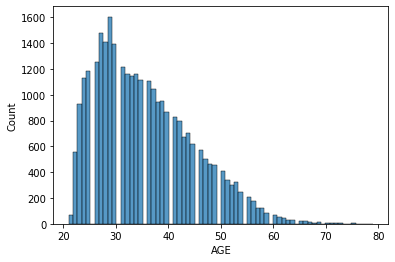

In [72]:
#I suspect we do not have enough data in older age groups. Let's plot the distribution.
sns.histplot(df['AGE'])

# Data Pre-processing
We are going to try different models to predict default payment. 
## Encoding categorical variables to numerical form

In [80]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [81]:
# Check unique values for all columns
for col in list(df.columns):
  print(col + ': ' + str(len(df[col].unique())))

LIMIT_BAL: 81
SEX: 2
EDUCATION: 7
MARRIAGE: 4
AGE: 56
PAY_0: 11
PAY_2: 11
PAY_3: 11
PAY_4: 11
PAY_5: 10
PAY_6: 10
BILL_AMT1: 22723
BILL_AMT2: 22346
BILL_AMT3: 22026
BILL_AMT4: 21548
BILL_AMT5: 21010
BILL_AMT6: 20604
PAY_AMT1: 7943
PAY_AMT2: 7899
PAY_AMT3: 7518
PAY_AMT4: 6937
PAY_AMT5: 6897
PAY_AMT6: 6939
default payment next month: 2


SEX is binary so we don't need to worry about.
We need to encode EDUCATION and MARRIAGE as those are categorical data and the meanings of each value cannot be ordered to make sense.
All other variables are numerical that do not need to be pre-processed.

In [82]:
# Convert categorical variable into dummy/indicator variables for EDUCATION
dummies_edu = pd.get_dummies(df['EDUCATION'], prefix='EDU')
df = pd.concat([df, dummies_edu], axis=1)
df.drop('EDUCATION', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6
0,20000,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,1,0,0,0,0
1,120000,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,1,0,0,0,0
2,90000,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,1,0,0,0,0
3,50000,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,1,0,0,0,0
4,50000,1,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,1,0,0,0,0


In [83]:
# Convert categorical variable into dummy/indicator variables for MARRIAGE
dummies_mar = pd.get_dummies(df['MARRIAGE'], prefix='MAR')
df = pd.concat([df, dummies_mar], axis=1)
df.drop('MARRIAGE', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MAR_0,MAR_1,MAR_2,MAR_3
0,20000,2,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,1,0,0,0,0,0,0,1,0
2,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,1,0,0,0,0,0,0,1,0
3,50000,2,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,1,0,0,0,0,0,1,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,1,0,0,0,0,0,1,0,0


## Split X and y variables

In [84]:
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

## Standardzie X data around 0 using StandardScaler

In [85]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MAR_0,MAR_1,MAR_2,MAR_3
0,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.021608,-0.738375,1.0669,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
1,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-0.021608,-0.738375,1.0669,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
2,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.021608,-0.738375,1.0669,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
3,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.021608,-0.738375,1.0669,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
4,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.021608,-0.738375,1.0669,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326


## Split X and y data into 70% training and 30% testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=88)

# Build classifiers to train on the training data


In [ ]:
#Use 4 different models in their default settings to train on the training data
models = {
  LogisticRegression(): 'Logistic Regression',
  SVC(): 'Support Vector Machine',
  MLPClassifier(): 'Neural Network',
  RandomForestClassifier(max_depth=2, random_state=0): 'Random Forest'
}

for model in models.keys():
  model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Show test results on different classifiers

In [ ]:
# Show prediction accuracy score for all 4 trained models, using test data
for model, name in models.items():
  print(name + ': {:.2f}%'.format(model.score(X_test, y_test) * 100))

Logistic Regression: 81.10%
Support Vector Machine: 81.74%
Neural Network: 79.99%
Random Forest: 79.87%


We could see that different classifiers achieved similar accuracy in predicting default payment using the given dataset. We should compare runtime in deployment with actual data size considered, in order to balance computational cost and prediction accuracy.